In [2]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

### Lesson 9
#### Title: Functions and ‘Apply’
##### Objectives:
1. Understand functions in Python; write your own functions
2. Understand how to apply functions to arrays or table columns in Python

1. The tips.csv dataset contains data on tips collected from a restaurant.
a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for
males overlaid with a histogram of tips for females. Discuss what you found.
b. Repeat part a, but broken down by time.

Let's first look at the `tips` table so we know what we're working with.

In [3]:
tips = Table.read_table('Data/tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


To make comparisons meaningful, we need to compute tips as a percentage of the total bill. We will make that with a new column:

In [4]:
pct = tips.with_column('tip_pct',tips.column('tip')/tips.column('total_bill')*100)
pct

total_bill,tip,sex,smoker,day,time,size,tip_pct
16.99,1.01,Female,No,Sun,Dinner,2,5.94467
10.34,1.66,Male,No,Sun,Dinner,3,16.0542
21.01,3.5,Male,No,Sun,Dinner,3,16.6587
23.68,3.31,Male,No,Sun,Dinner,2,13.978
24.59,3.61,Female,No,Sun,Dinner,4,14.6808
25.29,4.71,Male,No,Sun,Dinner,4,18.624
8.77,2,Male,No,Sun,Dinner,2,22.805
26.88,3.12,Male,No,Sun,Dinner,4,11.6071
15.04,1.96,Male,No,Sun,Dinner,2,13.0319
14.78,3.23,Male,No,Sun,Dinner,2,21.8539


For part a, we need to `group` the data entries by `sex`, and calculate the `mean` of those `tip` entries:

In [5]:
pct.select('sex','tip_pct').group('sex',np.mean)

sex,tip_pct mean
Female,16.6491
Male,15.7651


We will use a `hist`ogram to overlay all of the `tip`s for each `sex`.

C:\Users\C20Ignacio.Lara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


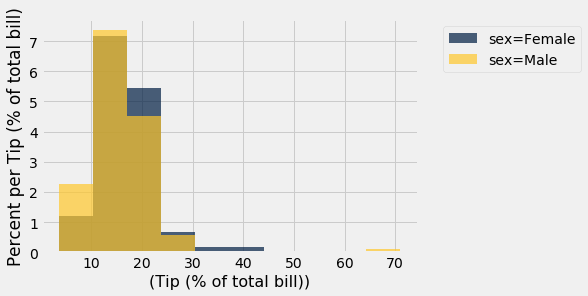

In [6]:
pct.hist('tip_pct',group='sex',unit='Tip (% of total bill)')

This histogram shows that males tend to be tipped a lower % of the total bill than females. For example, a greater proportion of males make between 0-15% than females.

For part b, we are going to regroup by `time` instead of by `sex`.

In [7]:
pct.select('time','tip_pct').group('time',np.mean)

time,tip_pct mean
Dinner,15.9518
Lunch,16.4128


C:\Users\C20Ignacio.Lara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


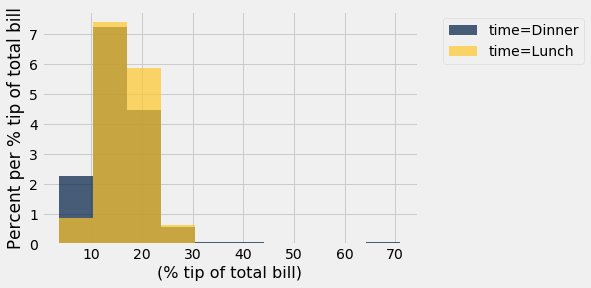

In [8]:
pct.hist('tip_pct',group='time',unit='% tip of total bill')

This shows us that people tend to tip a higher percentage during lunch hours than during dinner.
***
2. Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7).

In [22]:
week_nums = {
    "Mon" : 1,
    "Tues" : 2,
    "Wed" : 3,
    "Thur" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

def weekday_to_num(wkd):
    """ Returns a numerical code for a Str representing a day of the week.
    
    >>>weekday_to_num("Tues")
    2
    
    >>>weekday_to_num("Fri")
    5
    
    >>>weekday_to_num("NaN")
    NaN
    """
    if wkd=="NaN":
        return float("NaN")
    
    return week_nums[wkd]  

# Test
print(weekday_to_num("Thur"))

4


3) Apply this function to the day column of tips and include the result as a new column in
tips, called weekday_num.

In [10]:
pct = pct.with_column('weekday_num',pct.apply(weekday_to_num, 'day'))
pct

total_bill,tip,sex,smoker,day,time,size,tip_pct,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,5.94467,7
10.34,1.66,Male,No,Sun,Dinner,3,16.0542,7
21.01,3.5,Male,No,Sun,Dinner,3,16.6587,7
23.68,3.31,Male,No,Sun,Dinner,2,13.978,7
24.59,3.61,Female,No,Sun,Dinner,4,14.6808,7
25.29,4.71,Male,No,Sun,Dinner,4,18.624,7
8.77,2,Male,No,Sun,Dinner,2,22.805,7
26.88,3.12,Male,No,Sun,Dinner,4,11.6071,7
15.04,1.96,Male,No,Sun,Dinner,2,13.0319,7
14.78,3.23,Male,No,Sun,Dinner,2,21.8539,7


4) Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of \$20, we will simply look at all total bills near \$20 and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of \$1, we will look at all bills totaling \$19 thru \$21. The output of this function will be the predicted tip amount.

In [25]:
def est_tip(bill,rng, as_pct=False):
    """
    Returns a predicted tip based on a given bill amount.
    
    Compares all entries of bill, plus or minus rng, from the pct table and computes the average
    tip amount. If as_pct is True, returns the average percentage of total bill given as a tip.
    If as_pct is False, returns the average dollar amount.
    
    >>>est_tip(20,1)
    3.143333333333333
    
    >>>est_tip(20,1,as_pct=True)
    15.527538491744638
    """
    tip_val = 'tip'
    
    if as_pct:
        tip_val = 'tip_pct'
        
    return np.mean(pct.where('total_bill',are.between(bill-rng,bill+rng)).column(tip_val))

5) Apply this function to the `total_bill` column of `tips` and include the result as a new column in `tips`. Build a `scatter`plot showing predicted tip amount overlaid with actual tip amount.

In [15]:
preds = pct.with_columns('Predicted Tip ($)',pct.apply(lambda x: est_tip(x,1), 'total_bill'),
                        'Predicted Tip (%)', pct.apply(lambda x: est_tip(x,1,as_pct=True), 'total_bill'))
preds

total_bill,tip,sex,smoker,day,time,size,tip_pct,weekday_num,Predicted Tip ($),Predicted Tip (%)
16.99,1.01,Female,No,Sun,Dinner,2,5.94467,7,2.82437,16.66
10.34,1.66,Male,No,Sun,Dinner,3,16.0542,7,1.81136,17.6281
21.01,3.5,Male,No,Sun,Dinner,3,16.6587,7,3.3425,16.0786
23.68,3.31,Male,No,Sun,Dinner,2,13.978,7,3.33867,14.1357
24.59,3.61,Female,No,Sun,Dinner,4,14.6808,7,3.56267,14.4335
25.29,4.71,Male,No,Sun,Dinner,4,18.624,7,4.19909,16.6893
8.77,2,Male,No,Sun,Dinner,2,22.805,7,1.865,20.7116
26.88,3.12,Male,No,Sun,Dinner,4,11.6071,7,3.48111,12.9937
15.04,1.96,Male,No,Sun,Dinner,2,13.0319,7,2.426,16.0423
14.78,3.23,Male,No,Sun,Dinner,2,21.8539,7,2.43833,16.5375


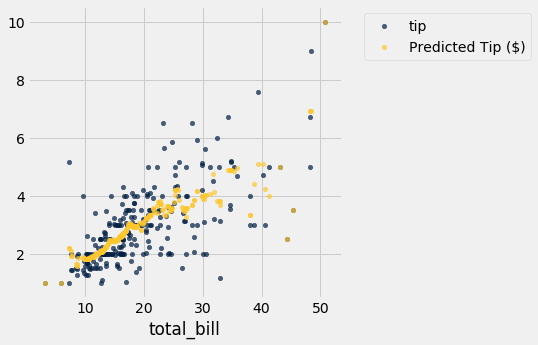

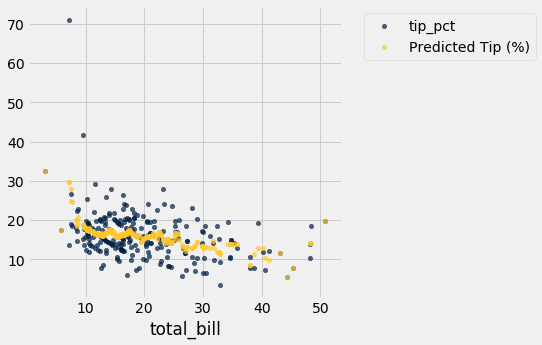

In [21]:
tip_compare = preds.select('total_bill','tip','Predicted Tip ($)')
tip_compare.scatter('total_bill')

pct_compare = preds.select('total_bill','tip_pct','Predicted Tip (%)')
pct_compare.scatter('total_bill')